In [1]:
import pandas as pd
import numpy as np 

import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [2]:
students = pd.read_excel('calibration_data_wide.xlsx')

In [3]:
students.shape

(448176, 22)

In [4]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448176 entries, 0 to 448175
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   FAKEID             448176 non-null  int64  
 1   RETAINED           448176 non-null  object 
 2   ENROLLED_1_BACK    448176 non-null  object 
 3   RACE_ETHN          448176 non-null  object 
 4   SEX                448176 non-null  object 
 5   TIME_STATUS        448176 non-null  object 
 6   FGEN               448176 non-null  object 
 7   STUDENT_CLASSIF    448176 non-null  object 
 8   PELL_EVER          448176 non-null  object 
 9   EFC                319931 non-null  float64
 10  HS_GPA             200811 non-null  float64
 11  TERM_GPA           448087 non-null  float64
 12  OriginalType       448176 non-null  object 
 13  CIP_2DIG           448176 non-null  object 
 14  AGE_AT_START_TERM  448176 non-null  object 
 15  ACT                448176 non-null  object 
 16  AS

In [5]:
students.head(20)

,FAKEID,RETAINED,ENROLLED_1_BACK,RACE_ETHN,SEX,TIME_STATUS,FGEN,STUDENT_CLASSIF,PELL_EVER,EFC,HS_GPA,TERM_GPA,OriginalType,CIP_2DIG,AGE_AT_START_TERM,ACT,ASTD,FA_RECD,DEPEND_STATUS,DUBYA_COUNT_TERM,SPAN,DAYS_BETWEEN
0,356453,Y,Y,White,F,FULL,1GX,SO,N,NaN,2.92,2.000000,TRANSFER,24,19 - 22,NADA,GOODBIN,N,unk,NONE,1,89
1,876229,N,N,Hispanic,M,FULL,1GN,FR,Y,0.0,NaN,0.462308,FIRST,11,19 - 22,20 or more,ISSUEBIN,Y,DEP,NONE,0,15
2,476074,Y,N,White,F,FULL,1GY,SE,Y,5603.0,3.58,3.500625,TRANSFER,26,19 - 22,20 or more,GOODBIN,Y,DEP,NONE,3,97
3,818465,Y,N,White,F,FULL,1GY,SE,Y,0.0,3.94,3.562500,FIRST,52,23-29,20 or more,GOODBIN,Y,IND,NONE,5,91
4,973275,Y,Y,White,F,FULL,1GN,SO,N,16120.0,3.13,3.333333,TRANSFER,52,19 - 22,20 or more,GOODBIN,Y,DEP,NONE,1,156
5,1299283,Y,Y,White,F,FULL,1GY,FR,N,NaN,3.03,2.666667,FIRST,43,18 or younger,NADA,GOODBIN,N,unk,NONE,0,43
6,1354331,Y,Y,White,M,FULL,1GY,SO,Y,33131.0,3.06,3.538462,TRANSFER,27,19 - 22,NADA,GOODBIN,Y,DEP,NONE,0,34
7,421268,N,Y,White,F,FULL,1GN,FR,Y,30623.0,NaN,0.000000,TRANSFER,42,19 - 22,Under 20,ISSUEBIN,Y,DEP,NONE,0,53
8,582122,Y,Y,White,M,PART,1GN,SO,Y,7138.0,NaN,3.000000,TRANSFER,49,23-29,NADA,GOODBIN,Y,IND,NONE,2,87
9,1153496,Y,Y,Hispanic,F,FULL,1GN,SO,N,NaN,2.32,2.668000,FIRST,26,19 - 22,Under 20,GOODBIN,N,unk,ONE_OR_MORE,2,56


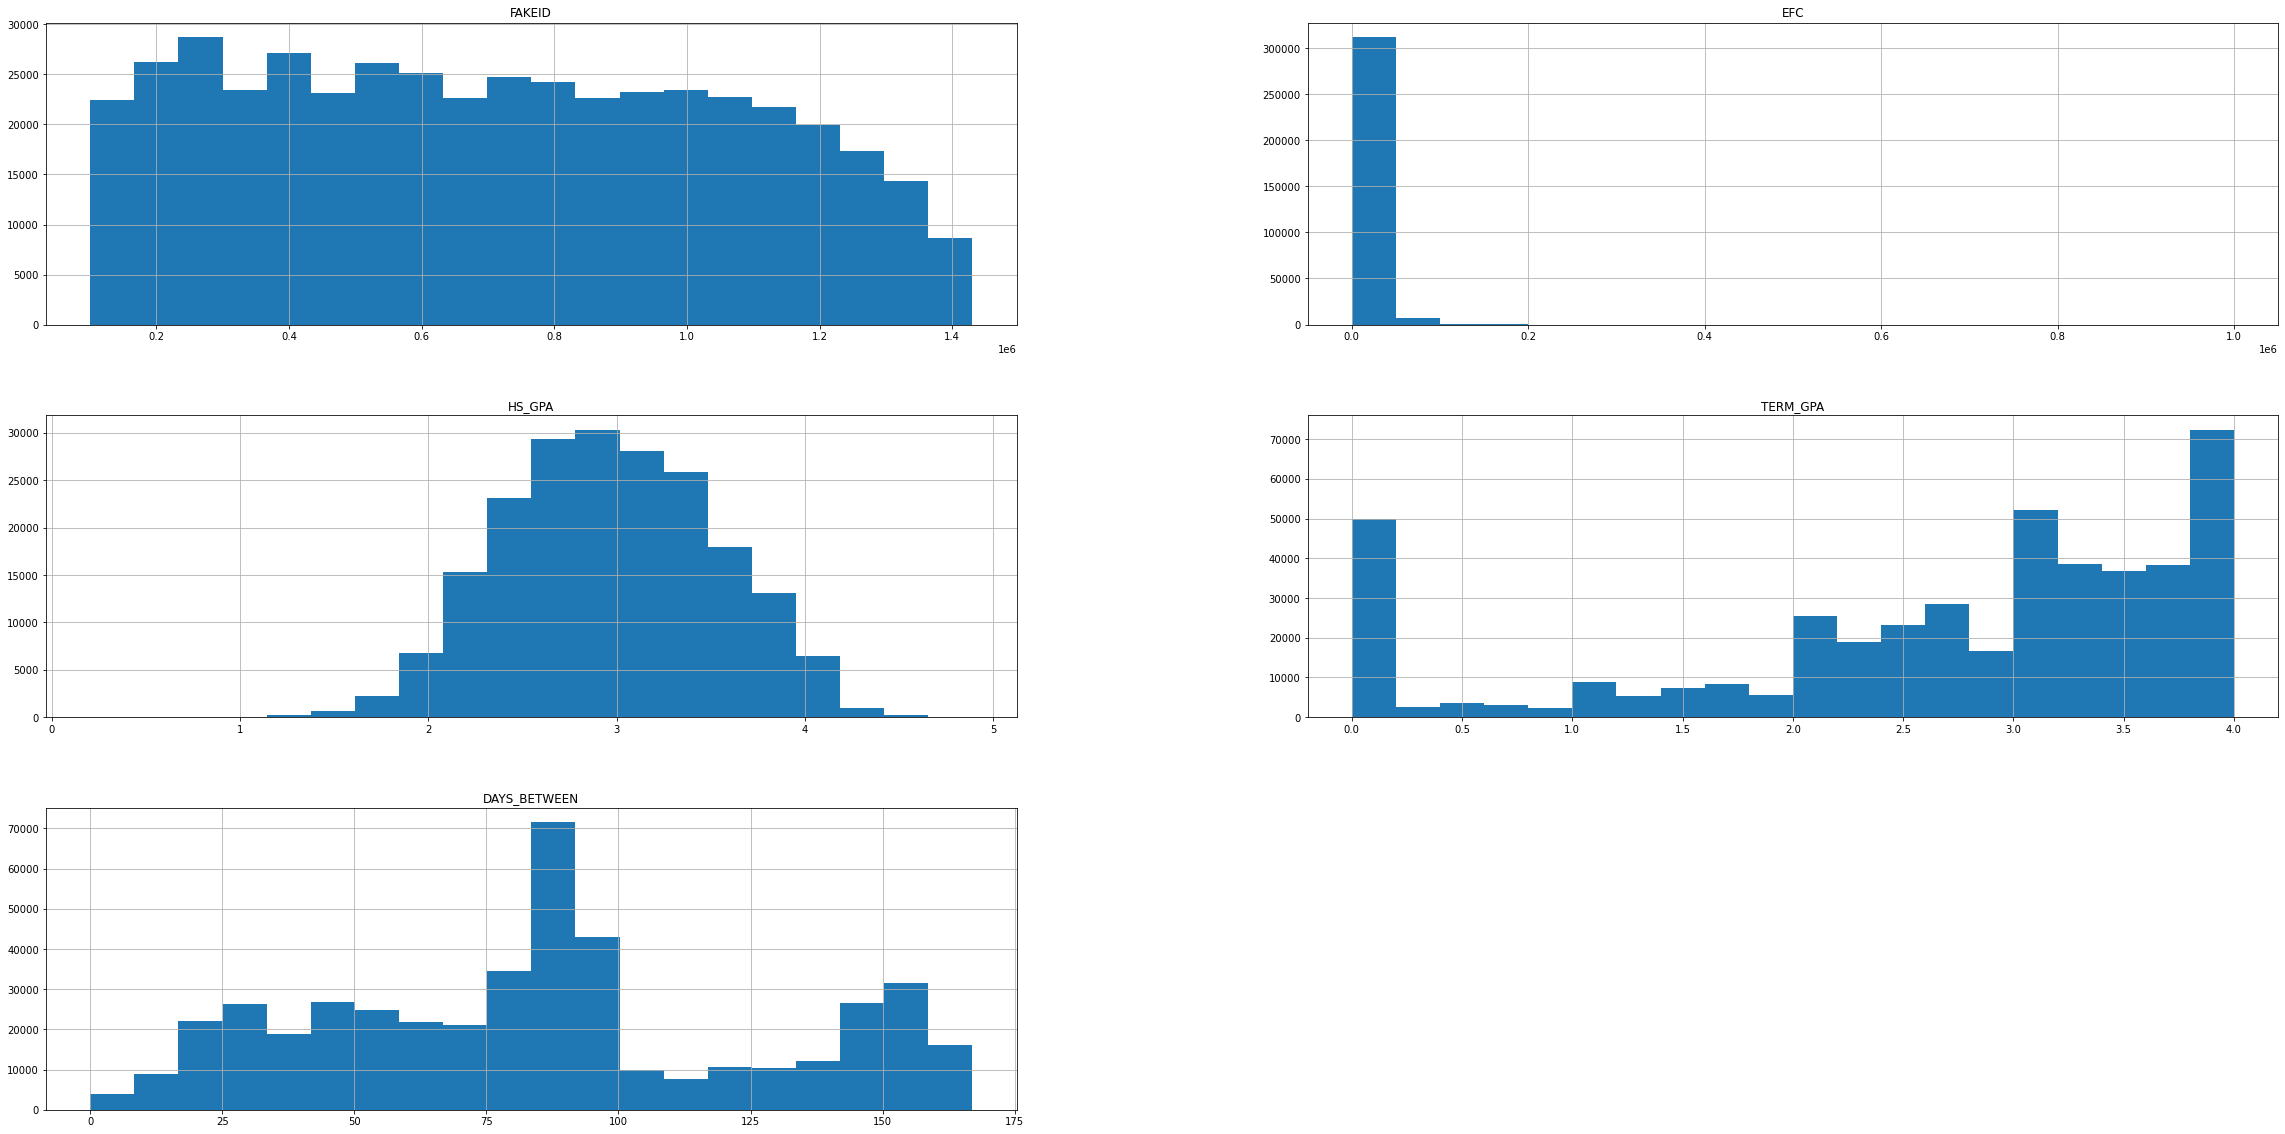

In [6]:
students.hist(figsize=(40,20), bins =20)
plt.show()

In [7]:
students.describe(include='all')

,FAKEID,RETAINED,ENROLLED_1_BACK,RACE_ETHN,SEX,TIME_STATUS,FGEN,STUDENT_CLASSIF,PELL_EVER,EFC,HS_GPA,TERM_GPA,OriginalType,CIP_2DIG,AGE_AT_START_TERM,ACT,ASTD,FA_RECD,DEPEND_STATUS,DUBYA_COUNT_TERM,SPAN,DAYS_BETWEEN
count,4.481760e+05,448176,448176,448176,448176,448176,448176,448176,448176,319931.000000,200811.000000,448087.000000,448176,448176.0,448176,448176,448176,448176,448176,448176,448176.0,448176.000000
unique,NaN,2,2,10,2,2,3,4,2,NaN,NaN,NaN,3,30.0,5,3,2,2,3,2,7.0,NaN
top,NaN,Y,Y,White,F,FULL,1GY,FR,Y,NaN,NaN,NaN,TRANSFER,52.0,19 - 22,NADA,GOODBIN,Y,IND,NONE,0.0,NaN
freq,NaN,304835,321034,263727,238216,273506,232209,122970,224641,NaN,NaN,NaN,232995,84306.0,171632,237788,385054,278625,168542,403484,120894.0,NaN
mean,7.075302e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9144.643736,2.966881,2.637338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.140681
std,3.620117e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21718.309328,0.557713,1.238381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.146607
min,1.000070e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.202899,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,3.951950e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,2.560000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.000000
50%,6.956745e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3441.000000,2.960000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.000000
75%,1.008361e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10704.000000,3.370000,3.583333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112.000000


In [8]:
variables = students.columns[students.dtypes == 'object']

In [9]:
for col in variables:
    print(f'{col}\n\n\n{students[col].value_counts(dropna=False)}\n\n')

RETAINED


Y    304835
N    143341
Name: RETAINED, dtype: int64


ENROLLED_1_BACK


Y    321034
N    127142
Name: ENROLLED_1_BACK, dtype: int64


RACE_ETHN


White                               263727
Hispanic                             97018
African American                     28154
Two or more races                    18240
Asian                                17765
Missing/Unknown                      16046
American Indian/Alaskan Native        2903
Two or More Races                     2152
International                         1405
Native Hawaiian/Pacific Islander       766
Name: RACE_ETHN, dtype: int64


SEX


F    238216
M    209960
Name: SEX, dtype: int64


TIME_STATUS


FULL    273506
PART    174670
Name: TIME_STATUS, dtype: int64


FGEN


1GY    232209
1GN    184910
1GX     31057
Name: FGEN, dtype: int64


STUDENT_CLASSIF


FR    122970
JU    115352
SE    105510
SO    104344
Name: STUDENT_CLASSIF, dtype: int64


PELL_EVER


Y    224641
N    223535
Name: PELL_EVER, dtype: in

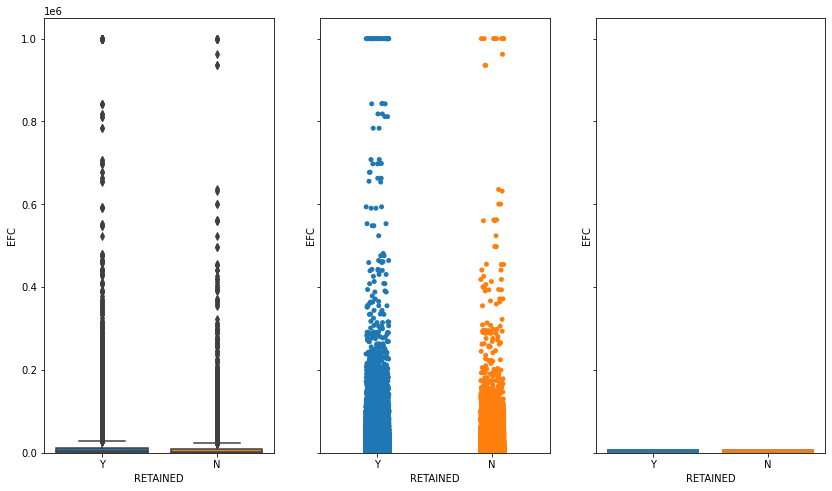

In [10]:
fig, ax = plt.subplots(ncols=3, sharey=True, sharex=True, figsize=(14,8))
sns.boxplot(x='RETAINED', y= 'EFC', data=students, ax=ax[0])
#sns.swarmplot(x='EFC', y= 'CIP_2DIG', data=students,hue = 'RETAINED', ax=ax[0], zorder=0)
sns.stripplot(x='RETAINED', y= 'EFC', data=students, ax=ax[1])
sns.barplot(x='RETAINED', y='EFC', data=students, ax=ax[2])
plt.show()

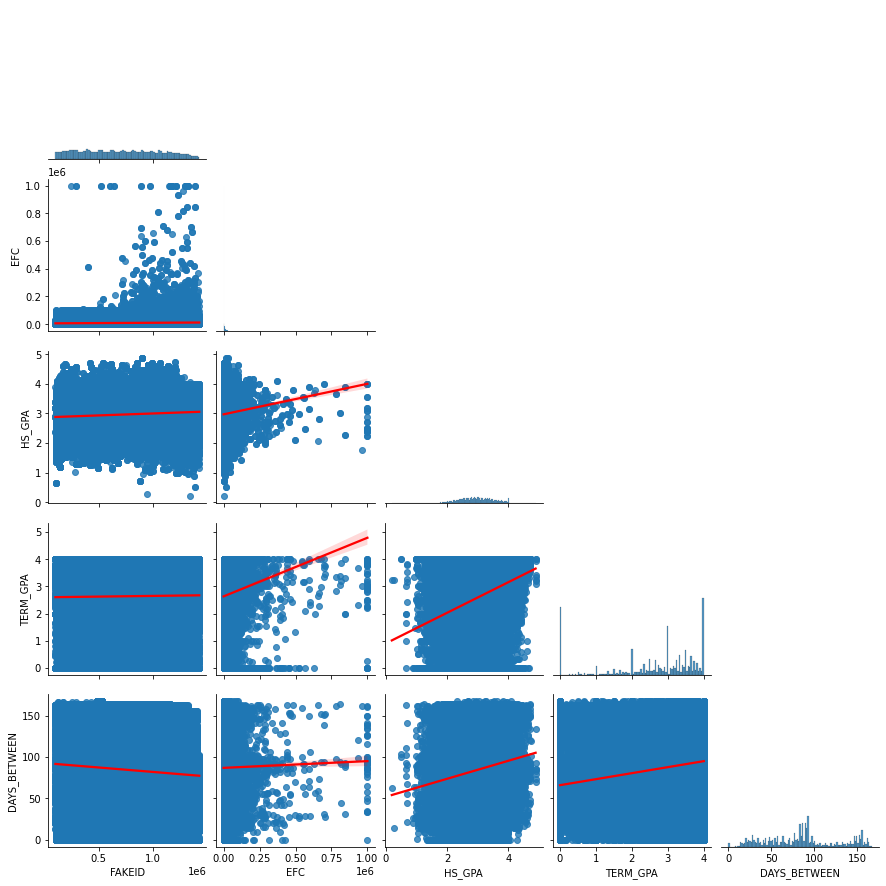

In [11]:
sns.pairplot(students, kind='reg', plot_kws={'line_kws':{'color':'red'}},corner=True)

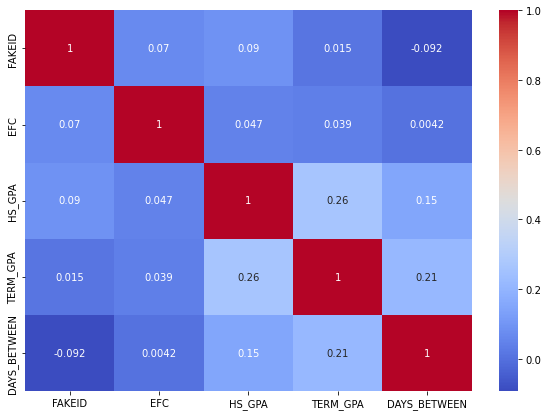

In [12]:
# Perform a Pearson Correlation on the dataset
plt.figure(figsize=(10,7))
correlate = students.corr()
# Plot the Correlation on a heatmap
sns.heatmap(correlate, annot=True, cmap='coolwarm')
plt.show()

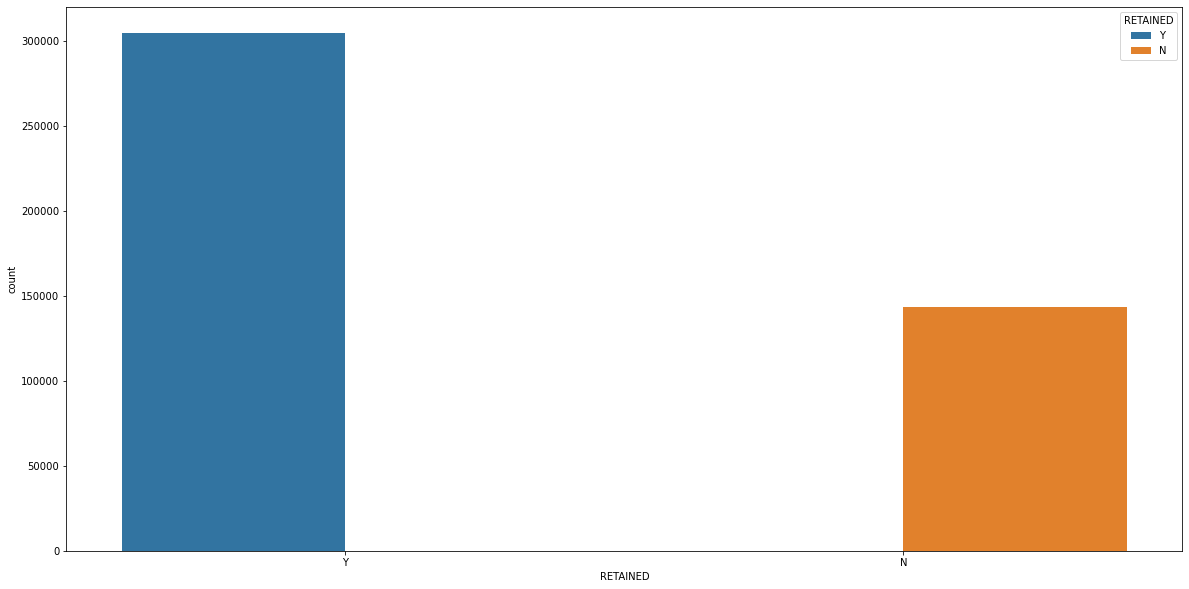

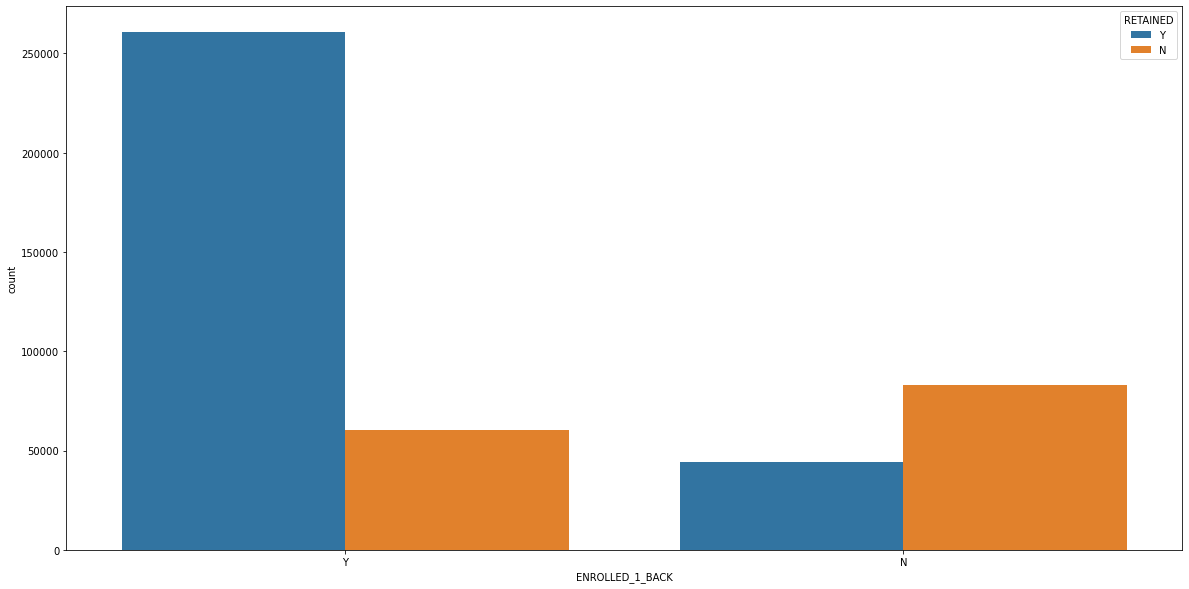

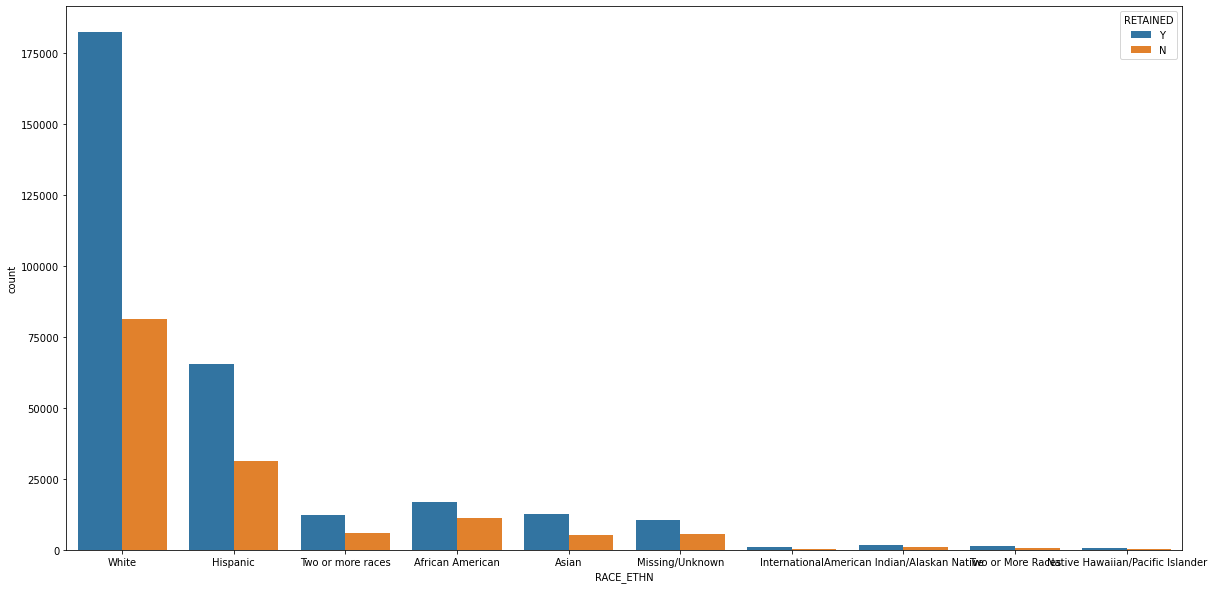

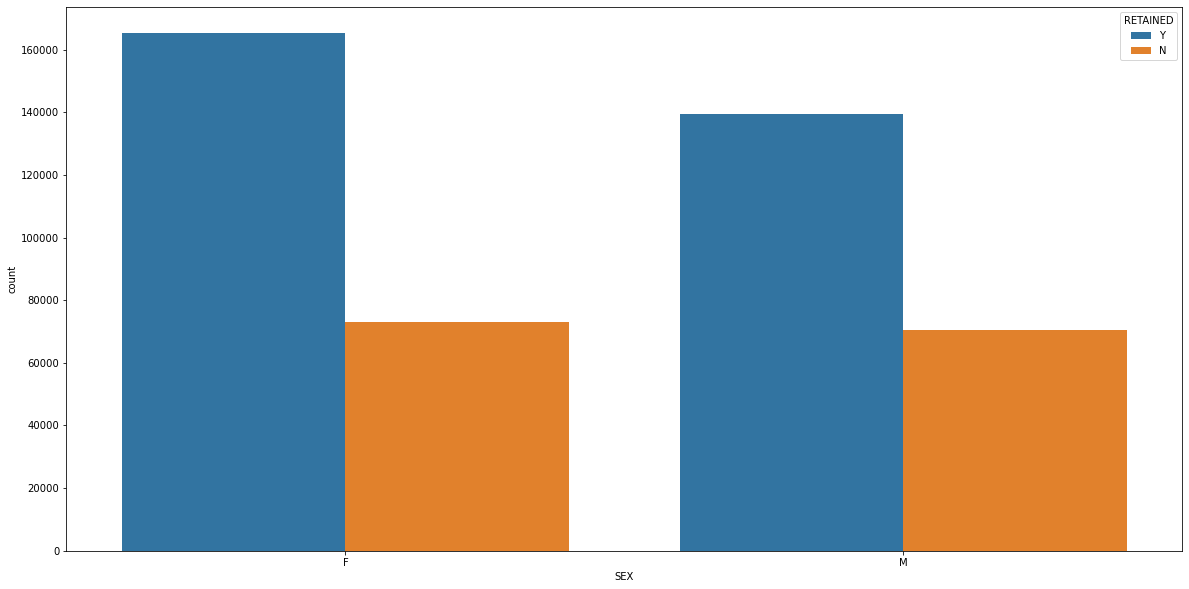

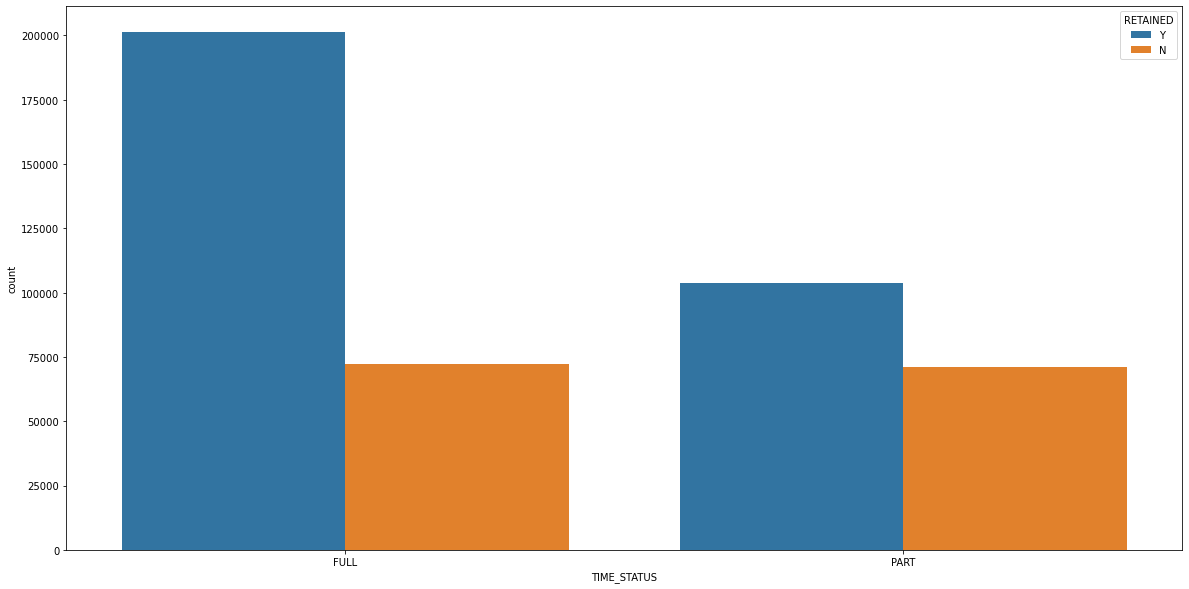

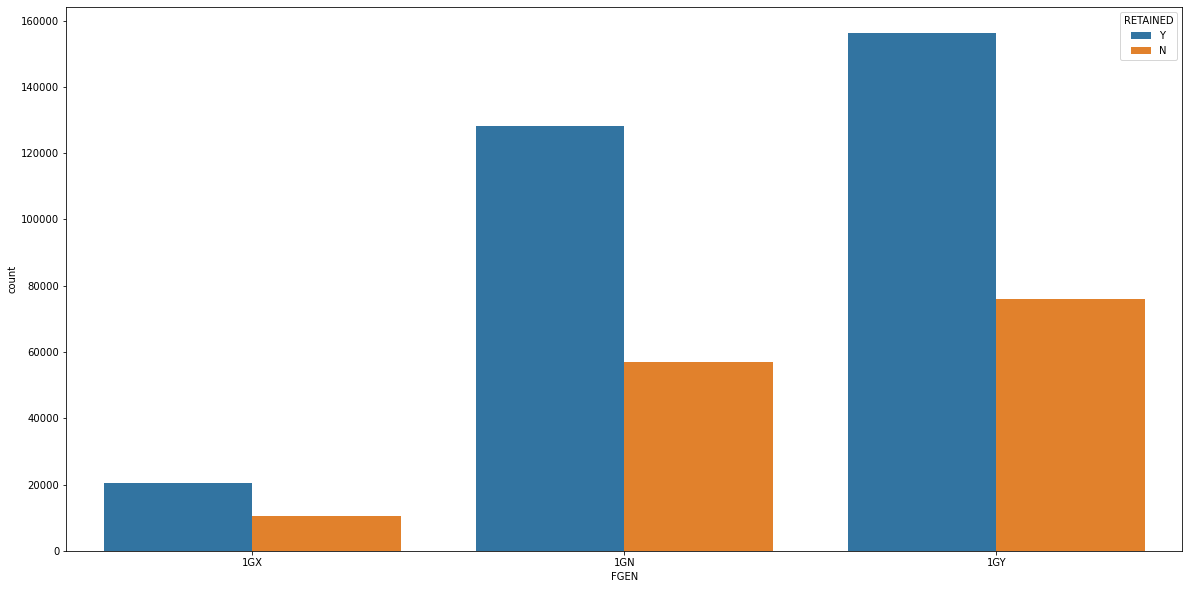

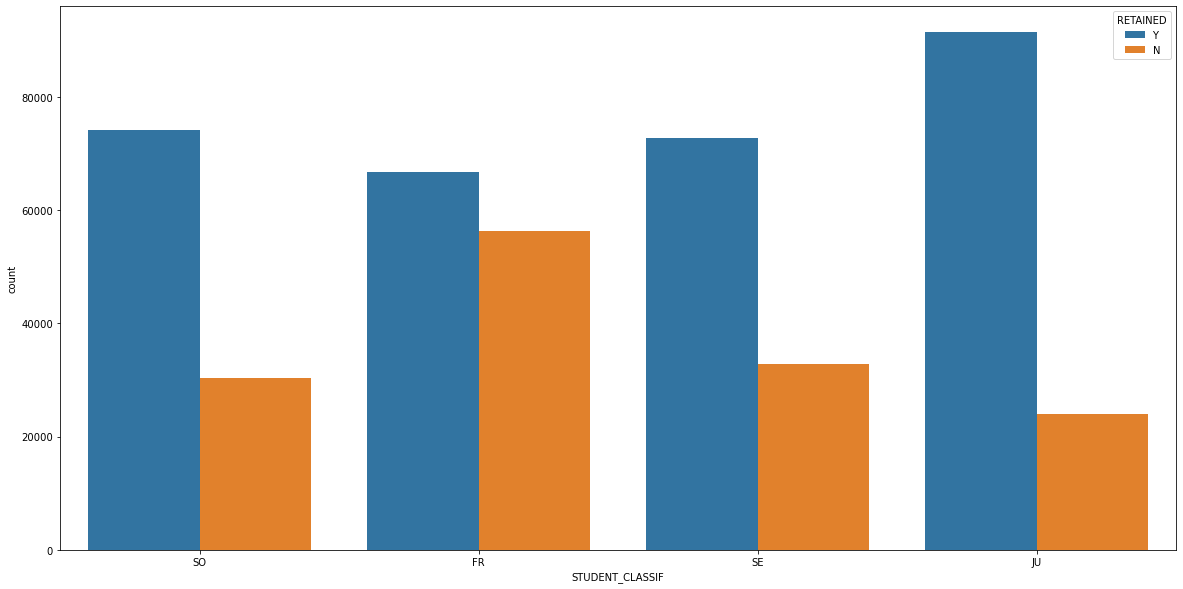

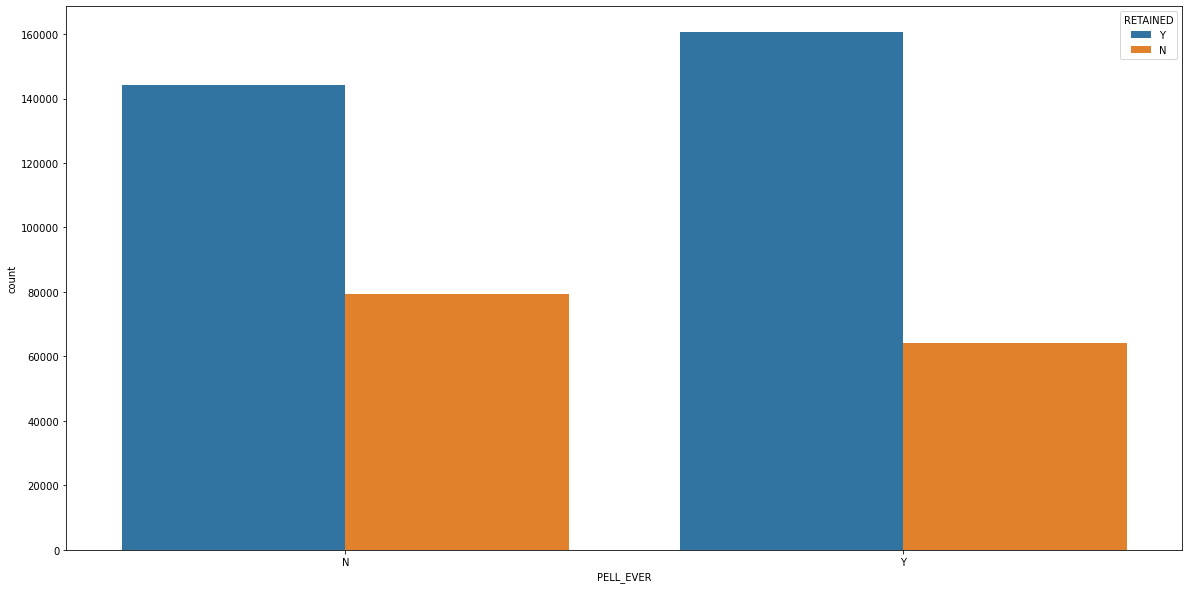

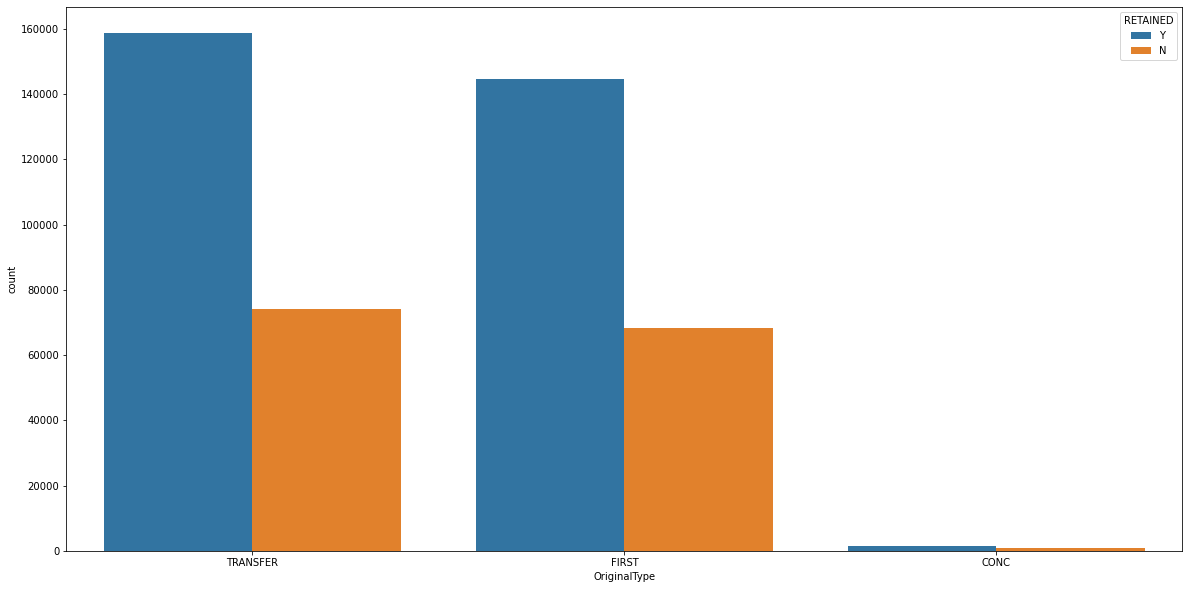

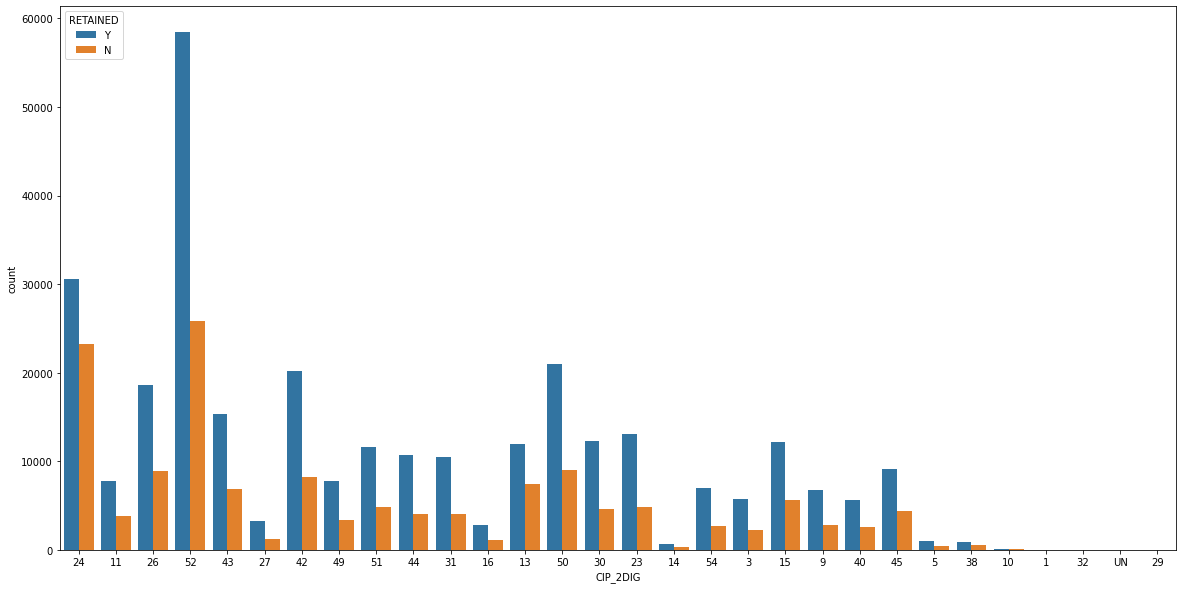

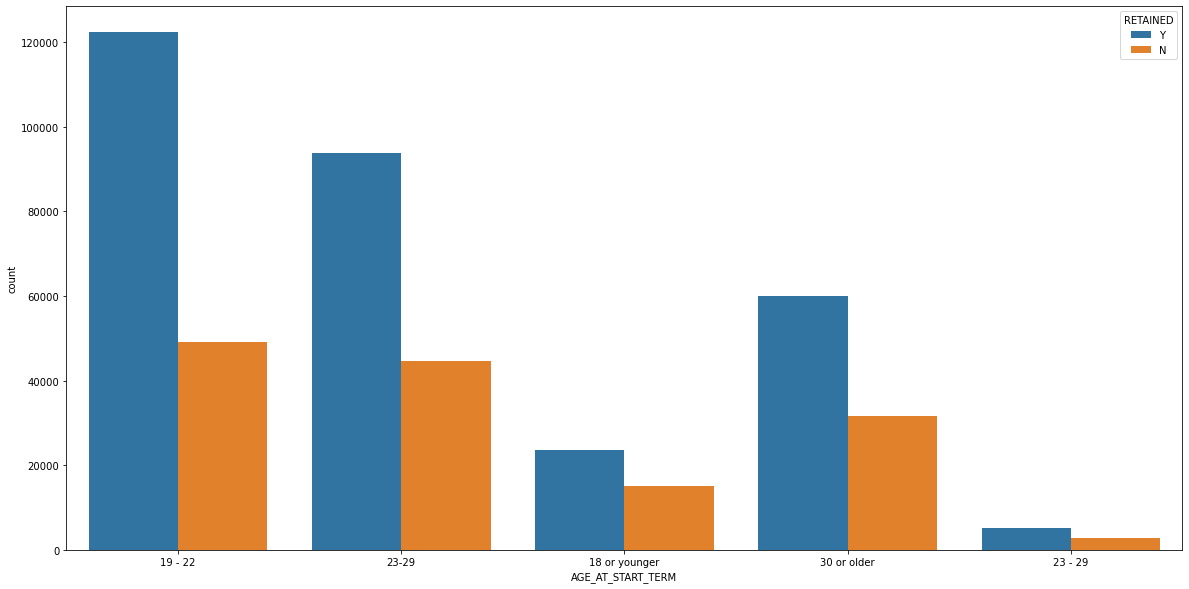

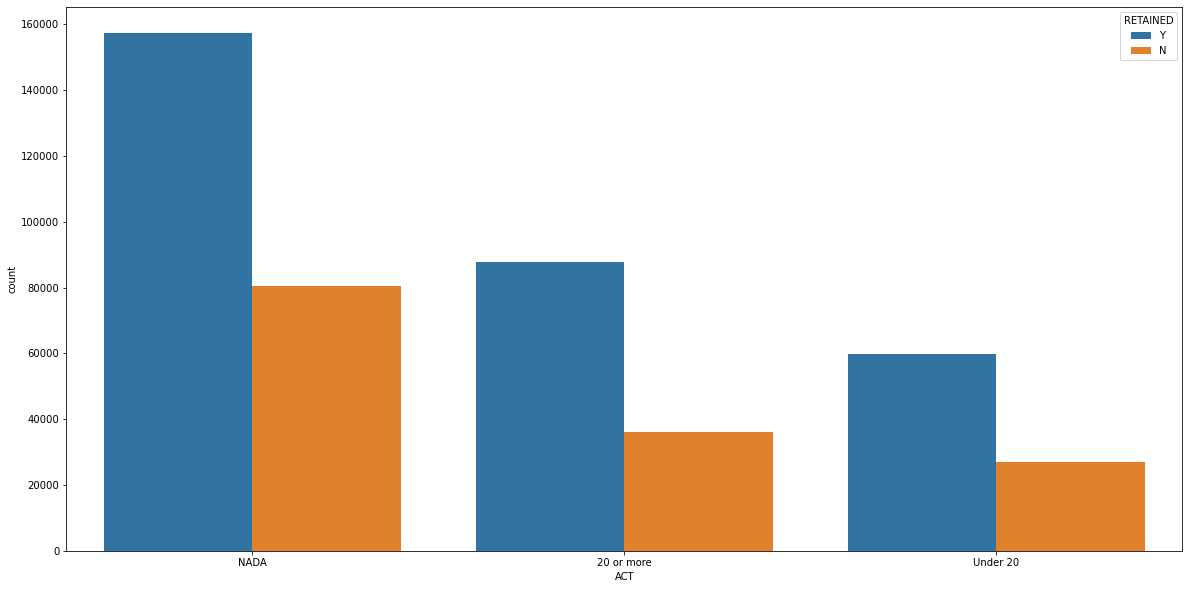

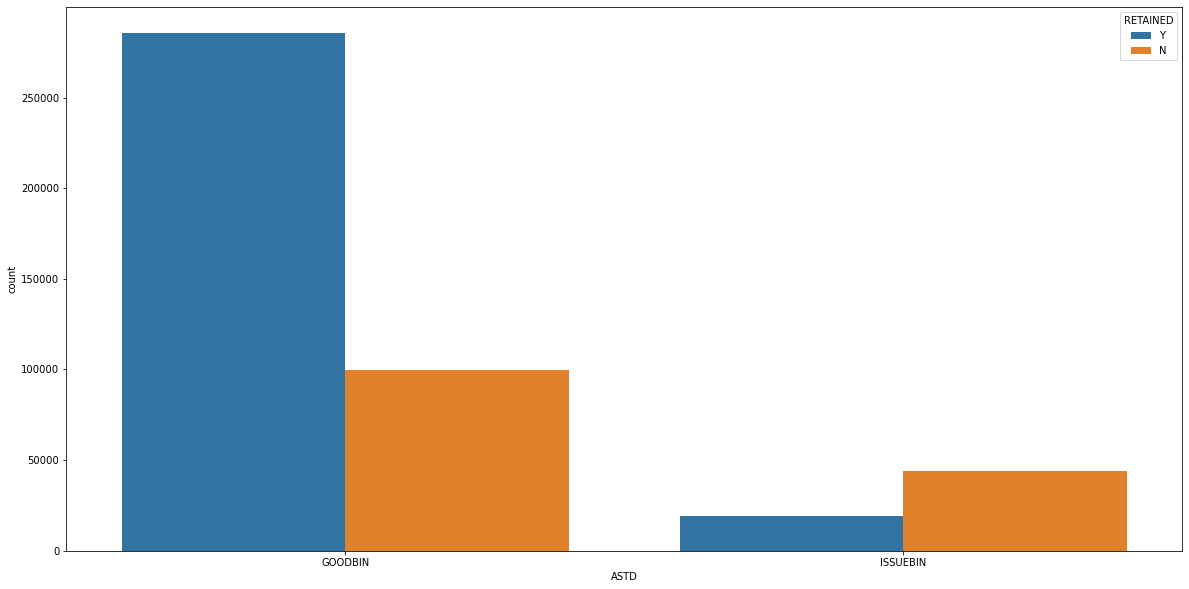

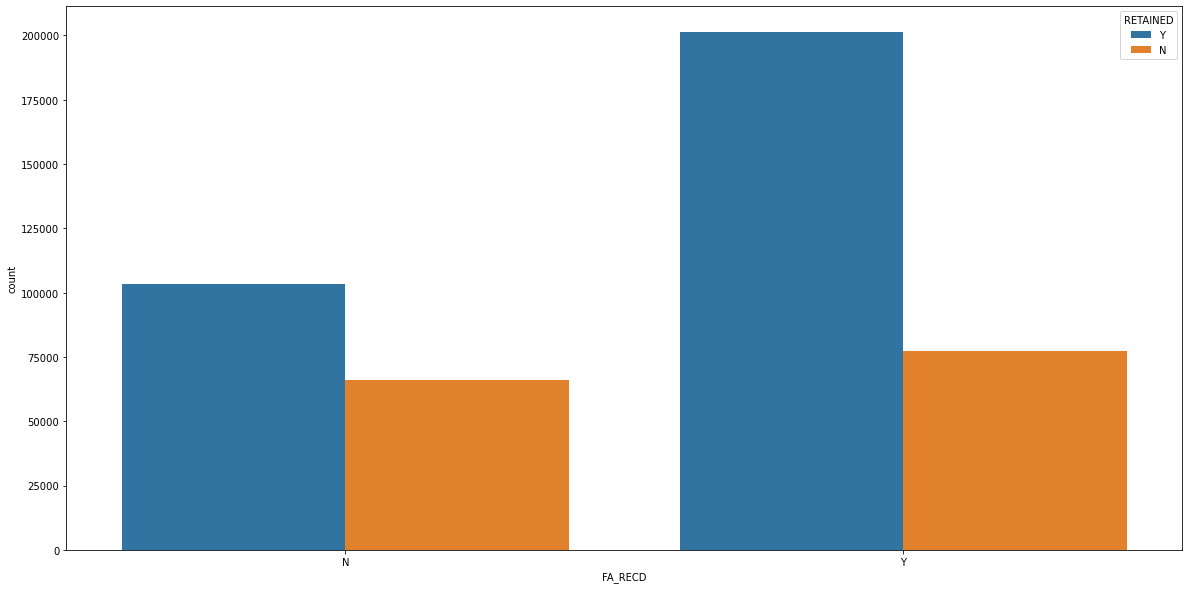

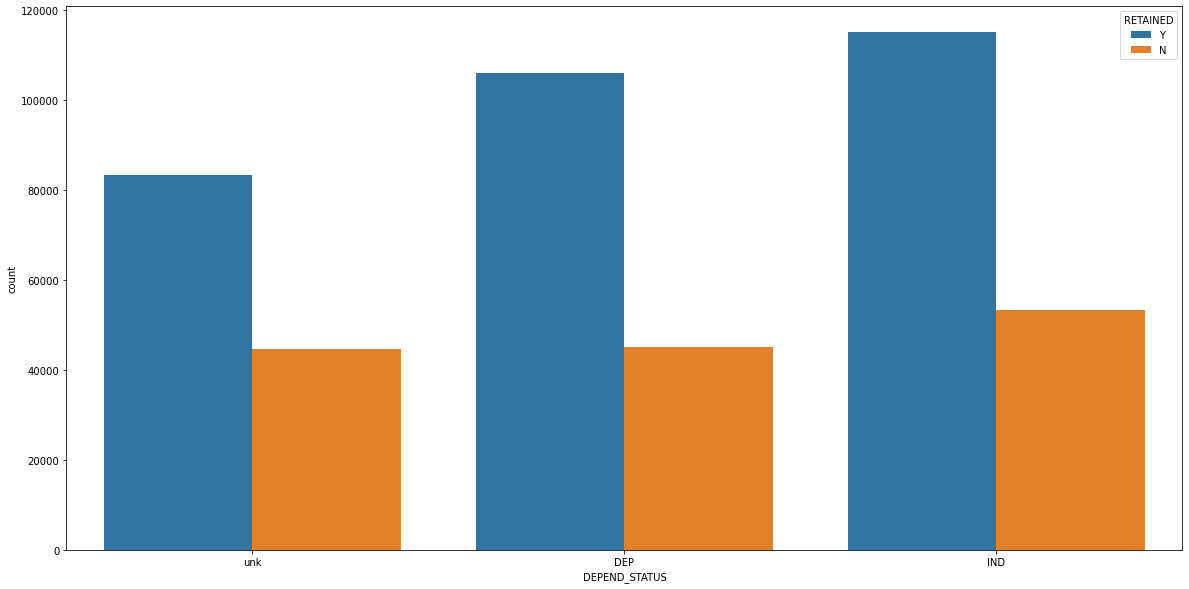

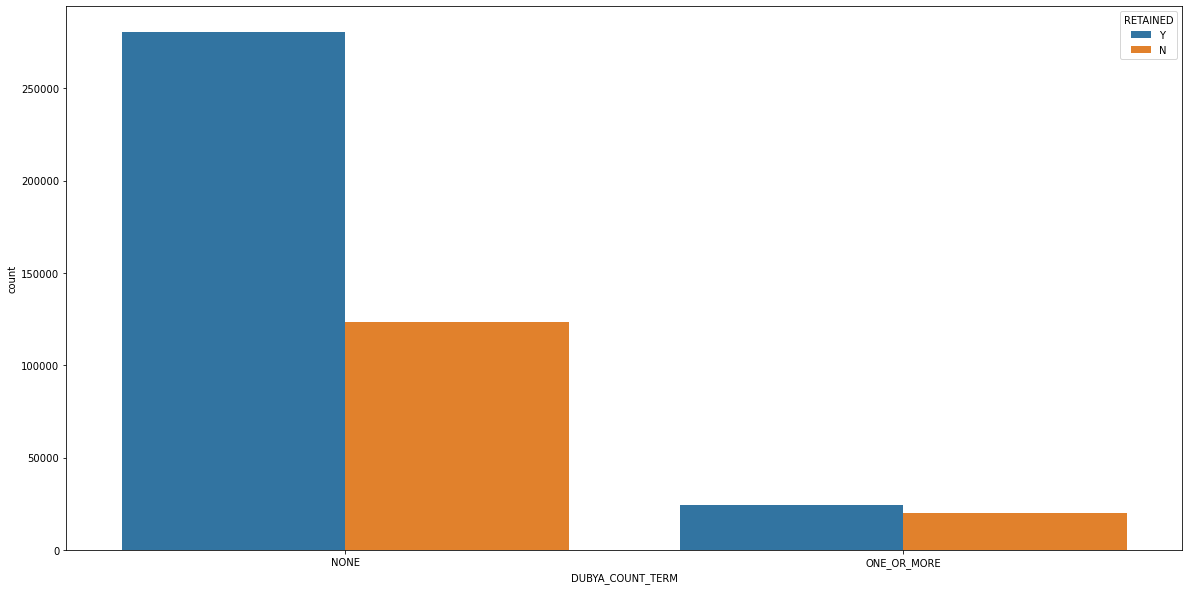

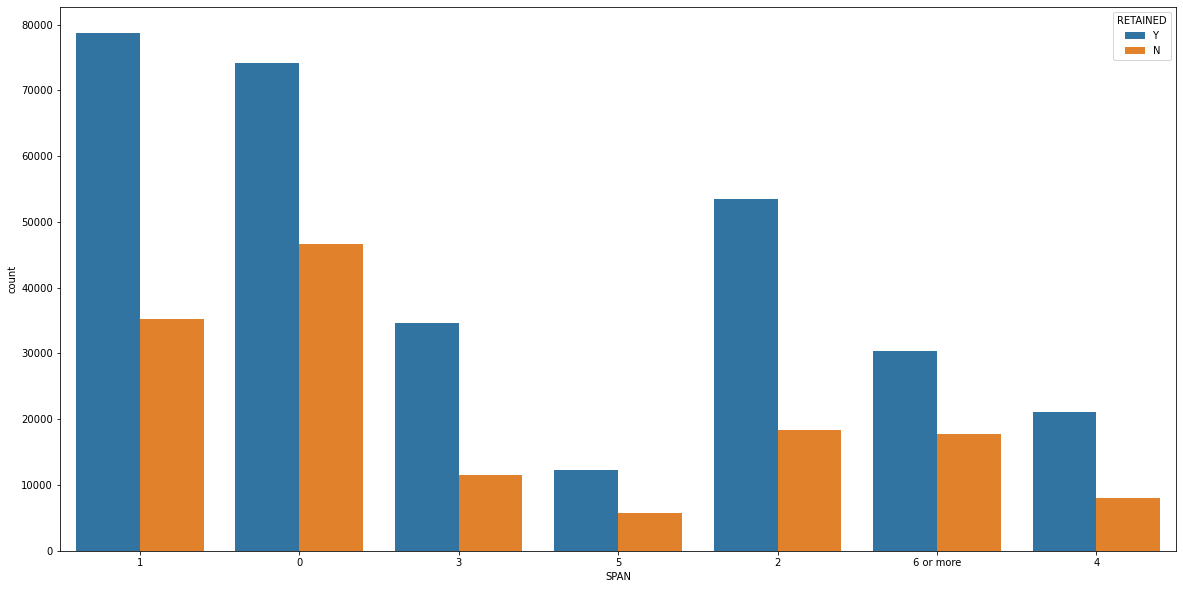

In [13]:
columns = students.columns[students.dtypes == 'object']

for col in columns:
    plt.figure(figsize=(20,10))
    sns.countplot(x=col,data=students,hue='RETAINED')
    plt.show()

In [14]:
students.CIP_2DIG.value_counts().sort_values()

UN        1
29        2
32        3
1        20
10      158
14      971
5      1435
38     1437
16     4010
27     4465
3      7899
40     8268
9      9551
54     9687
49    11209
11    11603
45    13601
31    14533
44    14714
51    16507
30    16913
15    17840
23    17900
13    19319
43    22261
26    27489
42    28332
50    29944
24    53798
52    84306
Name: CIP_2DIG, dtype: int64

In [15]:
students.head()

,FAKEID,RETAINED,ENROLLED_1_BACK,RACE_ETHN,SEX,TIME_STATUS,FGEN,STUDENT_CLASSIF,PELL_EVER,EFC,HS_GPA,TERM_GPA,OriginalType,CIP_2DIG,AGE_AT_START_TERM,ACT,ASTD,FA_RECD,DEPEND_STATUS,DUBYA_COUNT_TERM,SPAN,DAYS_BETWEEN
0,356453,Y,Y,White,F,FULL,1GX,SO,N,NaN,2.92,2.000000,TRANSFER,24,19 - 22,NADA,GOODBIN,N,unk,NONE,1,89
1,876229,N,N,Hispanic,M,FULL,1GN,FR,Y,0.0,NaN,0.462308,FIRST,11,19 - 22,20 or more,ISSUEBIN,Y,DEP,NONE,0,15
2,476074,Y,N,White,F,FULL,1GY,SE,Y,5603.0,3.58,3.500625,TRANSFER,26,19 - 22,20 or more,GOODBIN,Y,DEP,NONE,3,97
3,818465,Y,N,White,F,FULL,1GY,SE,Y,0.0,3.94,3.562500,FIRST,52,23-29,20 or more,GOODBIN,Y,IND,NONE,5,91
4,973275,Y,Y,White,F,FULL,1GN,SO,N,16120.0,3.13,3.333333,TRANSFER,52,19 - 22,20 or more,GOODBIN,Y,DEP,NONE,1,156


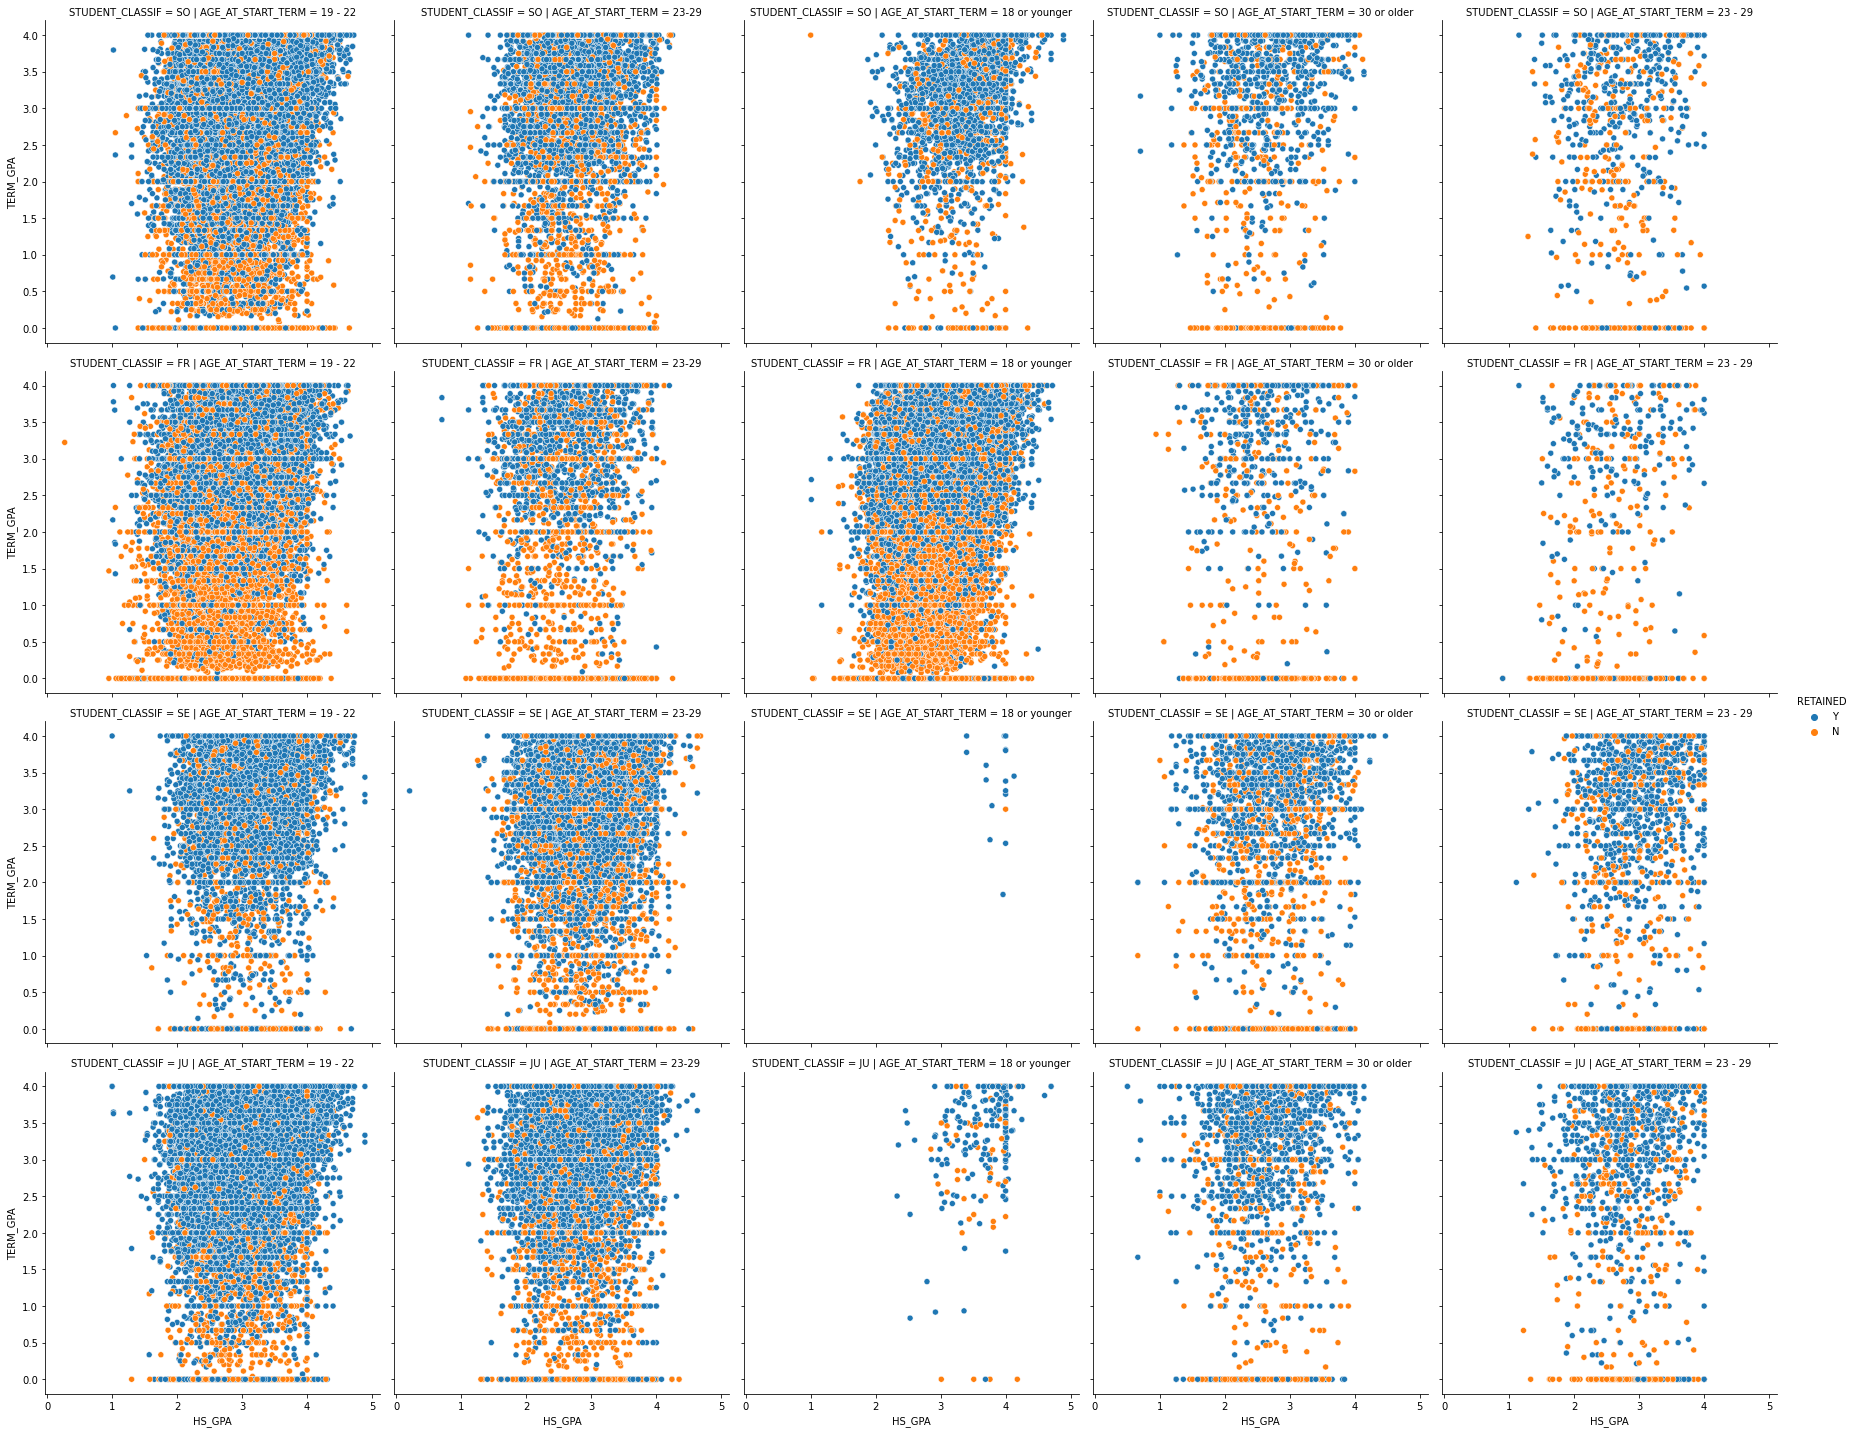

In [21]:
sns.relplot(x='HS_GPA',y='TERM_GPA',col='AGE_AT_START_TERM',row='STUDENT_CLASSIF',hue='RETAINED',data=students)

In [23]:
# sns.catplot(x='HS_GPA',y='TERM_GPA',col='AGE_AT_START_TERM',row='STUDENT_CLASSIF',hue='RETAINED',data=students)

Use groupby, value_counts(normalize=True)

RETAINED

--------------------------------------------------------------
RETAINED  RETAINED
Y         Y           304835
N         N           143341
Name: RETAINED, dtype: int64


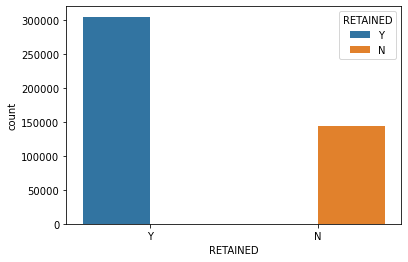

RETAINED  RETAINED
N         N           1.0
Y         Y           1.0
Name: RETAINED, dtype: float64


ENROLLED_1_BACK

--------------------------------------------------------------
ENROLLED_1_BACK  RETAINED
Y                Y           260678
N                N            82985
Y                N            60356
N                Y            44157
Name: RETAINED, dtype: int64


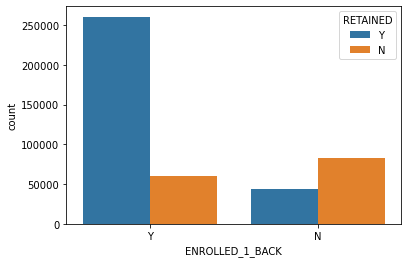

ENROLLED_1_BACK  RETAINED
Y                Y           0.811995
N                N           0.652695
                 Y           0.347305
Y                N           0.188005
Name: RETAINED, dtype: float64


RACE_ETHN

--------------------------------------------------------------
RACE_ETHN                         RETAINED
White                             Y           182496
                                  N            81231
Hispanic                          Y            65532
                                  N            31486
African American                  Y            16866
Asian                             Y            12635
Two or more races                 Y            12127
African American                  N            11288
Missing/Unknown                   Y            10412
Two or more races                 N             6113
Missing/Unknown                   N             5634
Asian                             N             5130
American Indian/Alaskan Native    Y 

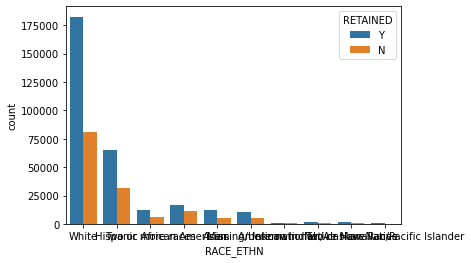

RACE_ETHN                         RETAINED
International                     Y           0.748043
Asian                             Y           0.711230
White                             Y           0.691988
Hispanic                          Y           0.675462
Two or More Races                 Y           0.666357
Two or more races                 Y           0.664857
Missing/Unknown                   Y           0.648884
Native Hawaiian/Pacific Islander  Y           0.647520
American Indian/Alaskan Native    Y           0.615226
African American                  Y           0.599062
                                  N           0.400938
American Indian/Alaskan Native    N           0.384774
Native Hawaiian/Pacific Islander  N           0.352480
Missing/Unknown                   N           0.351116
Two or more races                 N           0.335143
Two or More Races                 N           0.333643
Hispanic                          N           0.324538
White                 

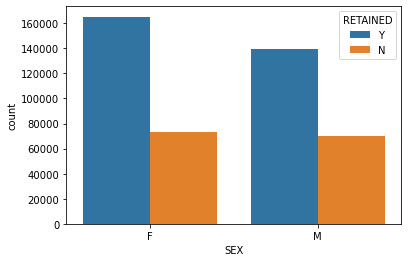

SEX  RETAINED
F    Y           0.693761
M    Y           0.664746
     N           0.335254
F    N           0.306239
Name: RETAINED, dtype: float64


TIME_STATUS

--------------------------------------------------------------
TIME_STATUS  RETAINED
FULL         Y           201227
PART         Y           103608
FULL         N            72279
PART         N            71062
Name: RETAINED, dtype: int64


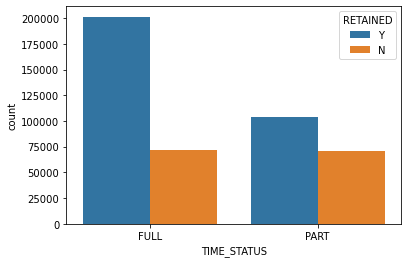

TIME_STATUS  RETAINED
FULL         Y           0.735732
PART         Y           0.593164
             N           0.406836
FULL         N           0.264268
Name: RETAINED, dtype: float64


FGEN

--------------------------------------------------------------
FGEN  RETAINED
1GY   Y           156217
1GN   Y           128056
1GY   N            75992
1GN   N            56854
1GX   Y            20562
      N            10495
Name: RETAINED, dtype: int64


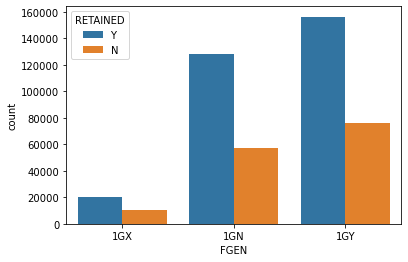

FGEN  RETAINED
1GN   Y           0.692532
1GY   Y           0.672743
1GX   Y           0.662073
      N           0.337927
1GY   N           0.327257
1GN   N           0.307468
Name: RETAINED, dtype: float64


STUDENT_CLASSIF

--------------------------------------------------------------
STUDENT_CLASSIF  RETAINED
JU               Y           91380
SO               Y           74056
SE               Y           72706
FR               Y           66693
                 N           56277
SE               N           32804
SO               N           30288
JU               N           23972
Name: RETAINED, dtype: int64


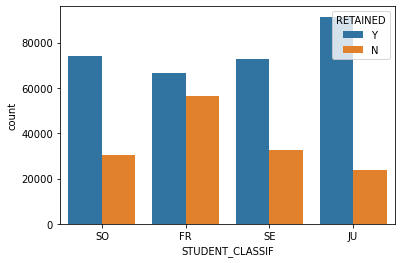

STUDENT_CLASSIF  RETAINED
JU               Y           0.792184
SO               Y           0.709729
SE               Y           0.689091
FR               Y           0.542352
                 N           0.457648
SE               N           0.310909
SO               N           0.290271
JU               N           0.207816
Name: RETAINED, dtype: float64


PELL_EVER

--------------------------------------------------------------
PELL_EVER  RETAINED
Y          Y           160572
N          Y           144263
           N            79272
Y          N            64069
Name: RETAINED, dtype: int64


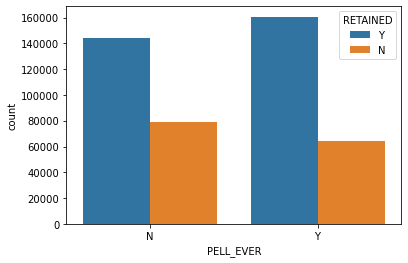

PELL_EVER  RETAINED
Y          Y           0.714794
N          Y           0.645371
           N           0.354629
Y          N           0.285206
Name: RETAINED, dtype: float64


OriginalType

--------------------------------------------------------------
OriginalType  RETAINED
TRANSFER      Y           158722
FIRST         Y           144593
TRANSFER      N            74273
FIRST         N            68357
CONC          Y             1520
              N              711
Name: RETAINED, dtype: int64


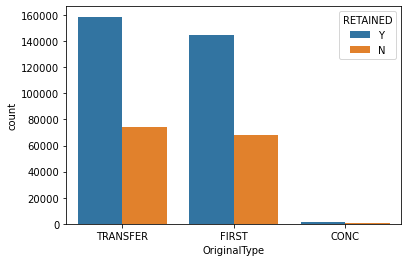

OriginalType  RETAINED
CONC          Y           0.681309
TRANSFER      Y           0.681225
FIRST         Y           0.679000
              N           0.321000
TRANSFER      N           0.318775
CONC          N           0.318691
Name: RETAINED, dtype: float64


CIP_2DIG

--------------------------------------------------------------
CIP_2DIG  RETAINED
52        Y           58438
24        Y           30562
52        N           25868
24        N           23236
50        Y           20965
42        Y           20139
26        Y           18627
43        Y           15363
23        Y           13043
30        Y           12266
15        Y           12185
13        Y           11925
51        Y           11654
44        Y           10705
31        Y           10483
45        Y            9168
50        N            8979
26        N            8862
42        N            8193
49        Y            7780
11        Y            7729
13        N            7394
54        Y            696

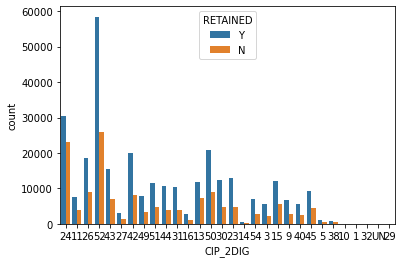

CIP_2DIG  RETAINED
UN        Y           1.000000
23        Y           0.728659
44        Y           0.727538
30        Y           0.725241
3         Y           0.722117
31        Y           0.721324
54        Y           0.718798
27        Y           0.718477
16        Y           0.710973
42        Y           0.710822
51        Y           0.706004
9         Y           0.704848
50        Y           0.700140
5         Y           0.695470
49        Y           0.694085
52        Y           0.693165
43        Y           0.690131
40        Y           0.686744
15        Y           0.683016
26        Y           0.677617
45        Y           0.674068
32        N           0.666667
11        Y           0.666121
10        Y           0.658228
14        Y           0.652935
1         N           0.650000
38        Y           0.640919
13        Y           0.617268
24        Y           0.568088
29        Y           0.500000
          N           0.500000
24        N         

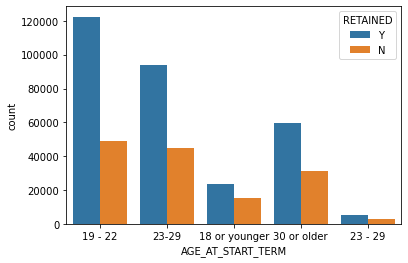

AGE_AT_START_TERM  RETAINED
19 - 22            Y           0.713066
23-29              Y           0.677769
30 or older        Y           0.655075
23 - 29            Y           0.647464
18 or younger      Y           0.609028
                   N           0.390972
23 - 29            N           0.352536
30 or older        N           0.344925
23-29              N           0.322231
19 - 22            N           0.286934
Name: RETAINED, dtype: float64


ACT

--------------------------------------------------------------
ACT         RETAINED
NADA        Y           157351
20 or more  Y            87711
NADA        N            80437
Under 20    Y            59773
20 or more  N            36027
Under 20    N            26877
Name: RETAINED, dtype: int64


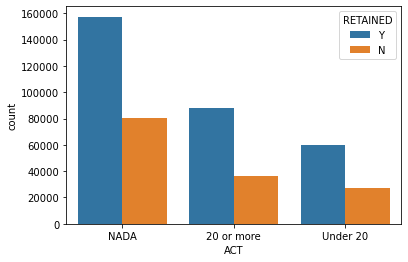

ACT         RETAINED
20 or more  Y           0.708844
Under 20    Y           0.689821
NADA        Y           0.661728
            N           0.338272
Under 20    N           0.310179
20 or more  N           0.291156
Name: RETAINED, dtype: float64


ASTD

--------------------------------------------------------------
ASTD      RETAINED
GOODBIN   Y           285544
          N            99510
ISSUEBIN  N            43831
          Y            19291
Name: RETAINED, dtype: int64


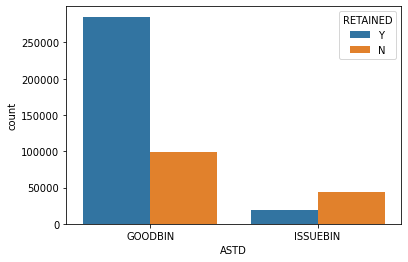

ASTD      RETAINED
GOODBIN   Y           0.741569
ISSUEBIN  N           0.694385
          Y           0.305615
GOODBIN   N           0.258431
Name: RETAINED, dtype: float64


FA_RECD

--------------------------------------------------------------
FA_RECD  RETAINED
Y        Y           201274
N        Y           103561
Y        N            77351
N        N            65990
Name: RETAINED, dtype: int64


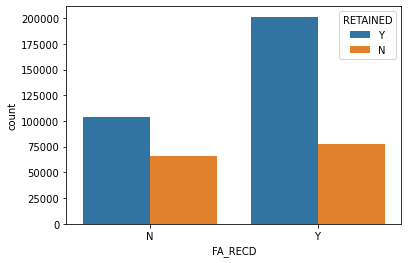

FA_RECD  RETAINED
Y        Y           0.722383
N        Y           0.610796
         N           0.389204
Y        N           0.277617
Name: RETAINED, dtype: float64


DEPEND_STATUS

--------------------------------------------------------------
DEPEND_STATUS  RETAINED
IND            Y           115172
DEP            Y           106169
unk            Y            83494
IND            N            53370
DEP            N            45218
unk            N            44753
Name: RETAINED, dtype: int64


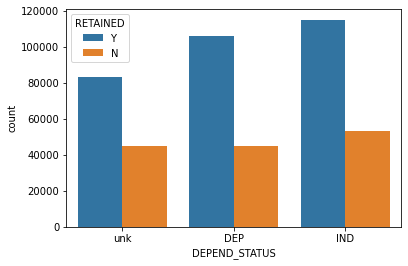

DEPEND_STATUS  RETAINED
DEP            Y           0.701309
IND            Y           0.683343
unk            Y           0.651041
               N           0.348959
IND            N           0.316657
DEP            N           0.298691
Name: RETAINED, dtype: float64


DUBYA_COUNT_TERM

--------------------------------------------------------------
DUBYA_COUNT_TERM  RETAINED
NONE              Y           280264
                  N           123220
ONE_OR_MORE       Y            24571
                  N            20121
Name: RETAINED, dtype: int64


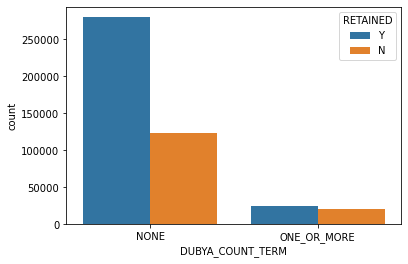

DUBYA_COUNT_TERM  RETAINED
NONE              Y           0.694610
ONE_OR_MORE       Y           0.549785
                  N           0.450215
NONE              N           0.305390
Name: RETAINED, dtype: float64


SPAN

--------------------------------------------------------------
SPAN       RETAINED
1          Y           78719
0          Y           74192
2          Y           53539
0          N           46702
1          N           35179
3          Y           34642
6 or more  Y           30418
4          Y           21034
2          N           18416
6 or more  N           17723
5          Y           12291
3          N           11468
4          N            8035
5          N            5818
Name: RETAINED, dtype: int64


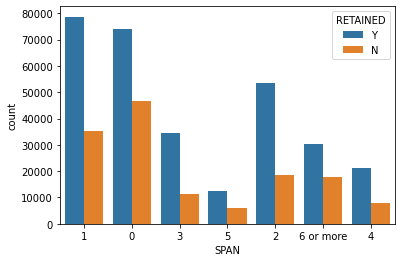

SPAN       RETAINED
3          Y           0.751290
2          Y           0.744062
4          Y           0.723589
1          Y           0.691136
5          Y           0.678723
6 or more  Y           0.631852
0          Y           0.613695
           N           0.386305
6 or more  N           0.368148
5          N           0.321277
1          N           0.308864
4          N           0.276411
2          N           0.255938
3          N           0.248710
Name: RETAINED, dtype: float64




In [62]:
columns = students.columns[students.dtypes == 'object']
for col in columns:
    print(f'{col}\n\n--------------------------------------------------------------')
    print(f'{students.groupby(col)["RETAINED"].value_counts().sort_values(ascending=False)}')
    sns.countplot(students[col], hue=students['RETAINED'])
    plt.show()
    print(f'{students.groupby(col)["RETAINED"].value_counts(normalize=True).sort_values(ascending=False)}')
    print(f'=======================================================\n\n')

Not Retained:


             FAKEID            EFC        HS_GPA       TERM_GPA   DAYS_BETWEEN
count  1.433410e+05   98587.000000  61251.000000  143306.000000  143341.000000
mean   7.206278e+05    8380.818678      2.859679       1.878450      73.130312
std    3.628978e+05   20670.856048      0.545338       1.461577      42.096765
min    1.000070e+05       0.000000      0.270000       0.000000       0.000000
25%    4.105870e+05       0.000000      2.470000       0.000000      37.000000
50%    7.024910e+05    2697.000000      2.840000       2.000000      71.000000
75%    1.022255e+06    9674.500000      3.250000       3.165000      93.000000
max    1.430305e+06  999999.000000      4.680000       4.000000     167.000000

Retained:


             FAKEID            EFC         HS_GPA       TERM_GPA  \
count  3.048350e+05  221344.000000  139560.000000  304781.000000   
mean   7.013713e+05    9484.852736       3.013930       2.994162   
std    3.614309e+05   22160.494377       0.556578       

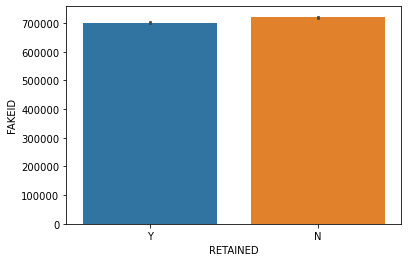



EFC

--------------------------------------------------------------


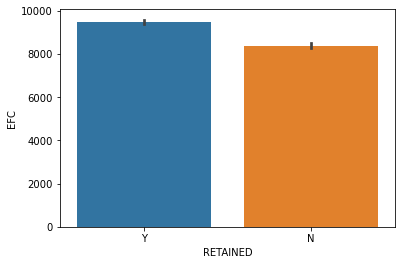



HS_GPA

--------------------------------------------------------------


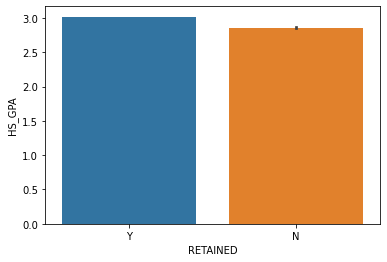



TERM_GPA

--------------------------------------------------------------


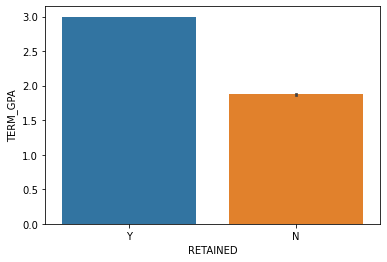



DAYS_BETWEEN

--------------------------------------------------------------


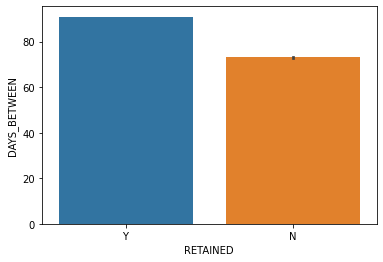

In [75]:
columns = students.columns[(students.dtypes == 'int') | (students.dtypes == 'float')]
print(f'Not Retained:\n\n')
print(f'{students[students["RETAINED"]=="N"].describe()}\n')
print(f'Retained:\n\n')
print(f'{students[students["RETAINED"]=="Y"].describe()}\n')

for col in columns:
    print(f'{col}\n\n--------------------------------------------------------------')
    sns.barplot(x='RETAINED', y=col, data= students)
    plt.show()
    print(f'=======================================================\n\n')

Rank values by their Retention percentage

Comparing subgroups to overall retention by scaling smaller groups up and see how it affects over all retention

RETAINED

--------------------------------------------------------------
RETAINED  RETAINED
Y         Y           304835
N         N           143341
Name: RETAINED, dtype: int64


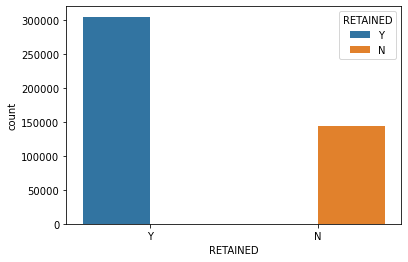

RETAINED  RETAINED
N         N           1.0
Y         Y           1.0
Name: RETAINED, dtype: float64


ENROLLED_1_BACK

--------------------------------------------------------------
RETAINED  ENROLLED_1_BACK
Y         Y                  260678
N         N                   82985
          Y                   60356
Y         N                   44157
Name: ENROLLED_1_BACK, dtype: int64


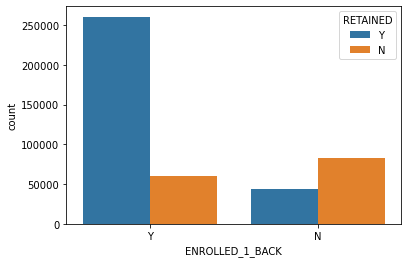

ENROLLED_1_BACK  RETAINED
Y                Y           0.811995
N                N           0.652695
                 Y           0.347305
Y                N           0.188005
Name: RETAINED, dtype: float64


RACE_ETHN

--------------------------------------------------------------
RETAINED  RACE_ETHN                       
Y         White                               182496
N         White                                81231
Y         Hispanic                             65532
N         Hispanic                             31486
Y         African American                     16866
          Asian                                12635
          Two or more races                    12127
N         African American                     11288
Y         Missing/Unknown                      10412
N         Two or more races                     6113
          Missing/Unknown                       5634
          Asian                                 5130
Y         American Indian/Alaskan Na

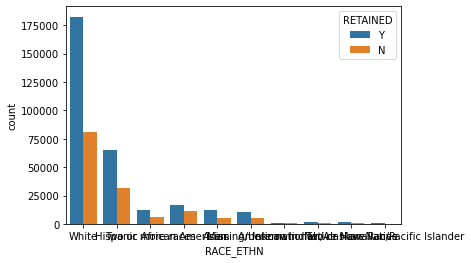

RACE_ETHN                         RETAINED
International                     Y           0.748043
Asian                             Y           0.711230
White                             Y           0.691988
Hispanic                          Y           0.675462
Two or More Races                 Y           0.666357
Two or more races                 Y           0.664857
Missing/Unknown                   Y           0.648884
Native Hawaiian/Pacific Islander  Y           0.647520
American Indian/Alaskan Native    Y           0.615226
African American                  Y           0.599062
                                  N           0.400938
American Indian/Alaskan Native    N           0.384774
Native Hawaiian/Pacific Islander  N           0.352480
Missing/Unknown                   N           0.351116
Two or more races                 N           0.335143
Two or More Races                 N           0.333643
Hispanic                          N           0.324538
White                 

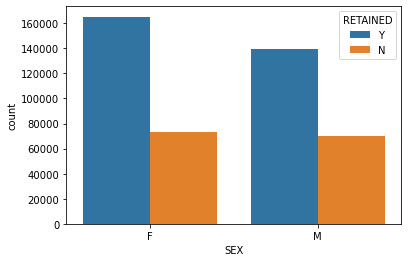

SEX  RETAINED
F    Y           0.693761
M    Y           0.664746
     N           0.335254
F    N           0.306239
Name: RETAINED, dtype: float64


TIME_STATUS

--------------------------------------------------------------
RETAINED  TIME_STATUS
Y         FULL           201227
          PART           103608
N         FULL            72279
          PART            71062
Name: TIME_STATUS, dtype: int64


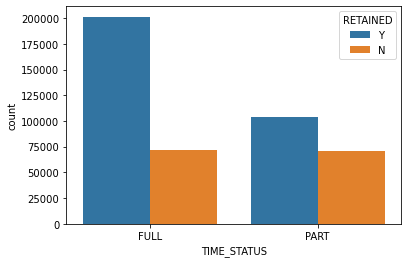

TIME_STATUS  RETAINED
FULL         Y           0.735732
PART         Y           0.593164
             N           0.406836
FULL         N           0.264268
Name: RETAINED, dtype: float64


FGEN

--------------------------------------------------------------
RETAINED  FGEN
Y         1GY     156217
          1GN     128056
N         1GY      75992
          1GN      56854
Y         1GX      20562
N         1GX      10495
Name: FGEN, dtype: int64


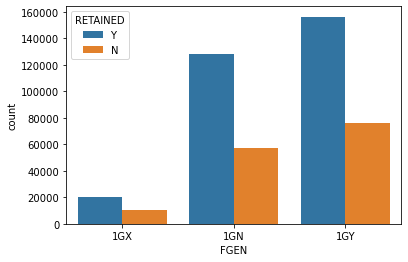

FGEN  RETAINED
1GN   Y           0.692532
1GY   Y           0.672743
1GX   Y           0.662073
      N           0.337927
1GY   N           0.327257
1GN   N           0.307468
Name: RETAINED, dtype: float64


STUDENT_CLASSIF

--------------------------------------------------------------
RETAINED  STUDENT_CLASSIF
Y         JU                 91380
          SO                 74056
          SE                 72706
          FR                 66693
N         FR                 56277
          SE                 32804
          SO                 30288
          JU                 23972
Name: STUDENT_CLASSIF, dtype: int64


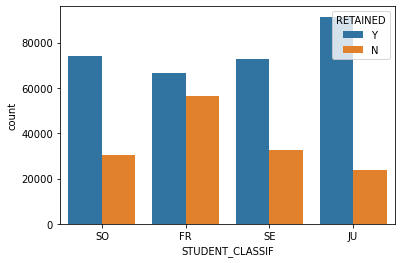

STUDENT_CLASSIF  RETAINED
JU               Y           0.792184
SO               Y           0.709729
SE               Y           0.689091
FR               Y           0.542352
                 N           0.457648
SE               N           0.310909
SO               N           0.290271
JU               N           0.207816
Name: RETAINED, dtype: float64


PELL_EVER

--------------------------------------------------------------
RETAINED  PELL_EVER
Y         Y            160572
          N            144263
N         N             79272
          Y             64069
Name: PELL_EVER, dtype: int64


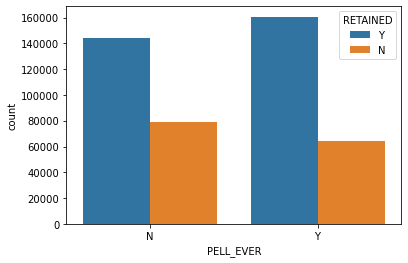

PELL_EVER  RETAINED
Y          Y           0.714794
N          Y           0.645371
           N           0.354629
Y          N           0.285206
Name: RETAINED, dtype: float64


OriginalType

--------------------------------------------------------------
RETAINED  OriginalType
Y         TRANSFER        158722
          FIRST           144593
N         TRANSFER         74273
          FIRST            68357
Y         CONC              1520
N         CONC               711
Name: OriginalType, dtype: int64


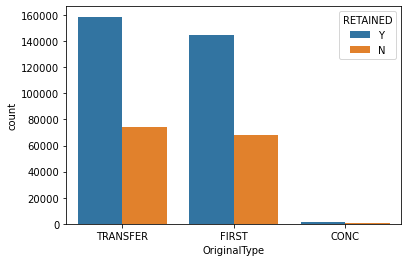

OriginalType  RETAINED
CONC          Y           0.681309
TRANSFER      Y           0.681225
FIRST         Y           0.679000
              N           0.321000
TRANSFER      N           0.318775
CONC          N           0.318691
Name: RETAINED, dtype: float64


CIP_2DIG

--------------------------------------------------------------
RETAINED  CIP_2DIG
Y         52          58438
          24          30562
N         52          25868
          24          23236
Y         50          20965
          42          20139
          26          18627
          43          15363
          23          13043
          30          12266
          15          12185
          13          11925
          51          11654
          44          10705
          31          10483
          45           9168
N         50           8979
          26           8862
          42           8193
Y         49           7780
          11           7729
N         13           7394
Y         54           696

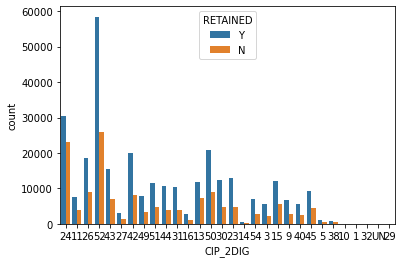

CIP_2DIG  RETAINED
UN        Y           1.000000
23        Y           0.728659
44        Y           0.727538
30        Y           0.725241
3         Y           0.722117
31        Y           0.721324
54        Y           0.718798
27        Y           0.718477
16        Y           0.710973
42        Y           0.710822
51        Y           0.706004
9         Y           0.704848
50        Y           0.700140
5         Y           0.695470
49        Y           0.694085
52        Y           0.693165
43        Y           0.690131
40        Y           0.686744
15        Y           0.683016
26        Y           0.677617
45        Y           0.674068
32        N           0.666667
11        Y           0.666121
10        Y           0.658228
14        Y           0.652935
1         N           0.650000
38        Y           0.640919
13        Y           0.617268
24        Y           0.568088
29        Y           0.500000
          N           0.500000
24        N         

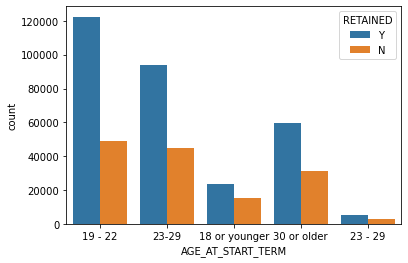

AGE_AT_START_TERM  RETAINED
19 - 22            Y           0.713066
23-29              Y           0.677769
30 or older        Y           0.655075
23 - 29            Y           0.647464
18 or younger      Y           0.609028
                   N           0.390972
23 - 29            N           0.352536
30 or older        N           0.344925
23-29              N           0.322231
19 - 22            N           0.286934
Name: RETAINED, dtype: float64


ACT

--------------------------------------------------------------
RETAINED  ACT       
Y         NADA          157351
          20 or more     87711
N         NADA           80437
Y         Under 20       59773
N         20 or more     36027
          Under 20       26877
Name: ACT, dtype: int64


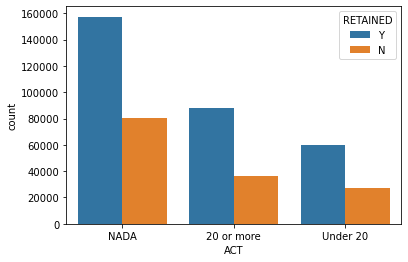

ACT         RETAINED
20 or more  Y           0.708844
Under 20    Y           0.689821
NADA        Y           0.661728
            N           0.338272
Under 20    N           0.310179
20 or more  N           0.291156
Name: RETAINED, dtype: float64


ASTD

--------------------------------------------------------------
RETAINED  ASTD    
Y         GOODBIN     285544
N         GOODBIN      99510
          ISSUEBIN     43831
Y         ISSUEBIN     19291
Name: ASTD, dtype: int64


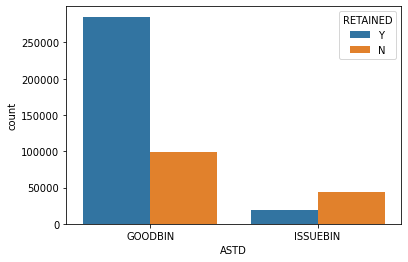

ASTD      RETAINED
GOODBIN   Y           0.741569
ISSUEBIN  N           0.694385
          Y           0.305615
GOODBIN   N           0.258431
Name: RETAINED, dtype: float64


FA_RECD

--------------------------------------------------------------
RETAINED  FA_RECD
Y         Y          201274
          N          103561
N         Y           77351
          N           65990
Name: FA_RECD, dtype: int64


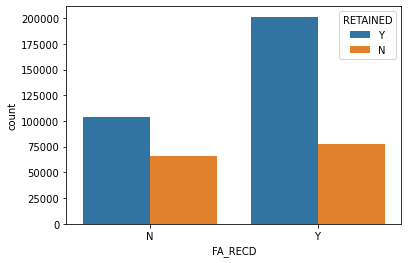

FA_RECD  RETAINED
Y        Y           0.722383
N        Y           0.610796
         N           0.389204
Y        N           0.277617
Name: RETAINED, dtype: float64


DEPEND_STATUS

--------------------------------------------------------------
RETAINED  DEPEND_STATUS
Y         IND              115172
          DEP              106169
          unk               83494
N         IND               53370
          DEP               45218
          unk               44753
Name: DEPEND_STATUS, dtype: int64


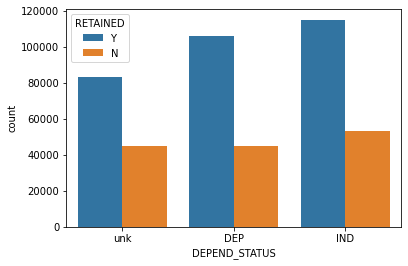

DEPEND_STATUS  RETAINED
DEP            Y           0.701309
IND            Y           0.683343
unk            Y           0.651041
               N           0.348959
IND            N           0.316657
DEP            N           0.298691
Name: RETAINED, dtype: float64


DUBYA_COUNT_TERM

--------------------------------------------------------------
RETAINED  DUBYA_COUNT_TERM
Y         NONE                280264
N         NONE                123220
Y         ONE_OR_MORE          24571
N         ONE_OR_MORE          20121
Name: DUBYA_COUNT_TERM, dtype: int64


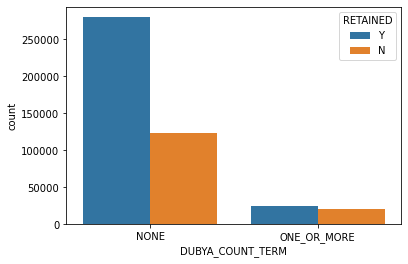

DUBYA_COUNT_TERM  RETAINED
NONE              Y           0.694610
ONE_OR_MORE       Y           0.549785
                  N           0.450215
NONE              N           0.305390
Name: RETAINED, dtype: float64


SPAN

--------------------------------------------------------------
RETAINED  SPAN     
Y         1            78719
          0            74192
          2            53539
N         0            46702
          1            35179
Y         3            34642
          6 or more    30418
          4            21034
N         2            18416
          6 or more    17723
Y         5            12291
N         3            11468
          4             8035
          5             5818
Name: SPAN, dtype: int64


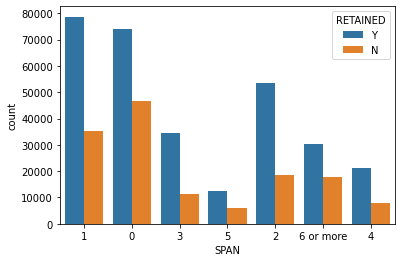

SPAN       RETAINED
3          Y           0.751290
2          Y           0.744062
4          Y           0.723589
1          Y           0.691136
5          Y           0.678723
6 or more  Y           0.631852
0          Y           0.613695
           N           0.386305
6 or more  N           0.368148
5          N           0.321277
1          N           0.308864
4          N           0.276411
2          N           0.255938
3          N           0.248710
Name: RETAINED, dtype: float64




In [86]:
columns = students.columns[students.dtypes == 'object']
for col in columns:
    print(f'{col}\n\n--------------------------------------------------------------')
    print(f'{students.groupby("RETAINED")[col].value_counts().sort_values(ascending=False)}')
    sns.countplot(students[col], hue=students['RETAINED'])
    plt.show()
    print(f'{students.groupby(col)["RETAINED"].value_counts(normalize=True).sort_values(ascending=False)}')
    print(f'=======================================================\n\n')